In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

sampling = 0.05
dataRange = 1.5
x = np.arange(-dataRange, dataRange, sampling)

In [41]:
def convC(f, g):
    N1 = len(f)
    N2 = len(g)
    result = np.zeros(N1+N2-1)
    for i in range(N1+N2-1):
        for j in range(N2-1):
            if (i-j>0) and (i-j<N1-1):
                result[i] += f[i-j]*g[j]
    return np.abs(result)
    #return sum([f(i)*g(t-i) for i in x])
    #return integrate.quad(lambda y: f(y)*g(t-y), -np.inf, np.inf)[0]

def corellC(f, g):
    N1 = len(f)
    N2 = len(g)
    result = np.zeros(N1+N2-1)
    for i in range(N1+N2-1):
        for j in range(N2-1):
            if (j+i-N2>0) and (j+i-N2<N1-1):
                result[i] += f[j+i-N2]*g[j]
    return np.flip(result,0)
    #return sum([f(i)*g(t+i) for i in x])
    #return integrate.quad(lambda y: np.conjugate(f(y))*g(t+y), -np.inf, np.inf)[0]

In [42]:
def rect(x):
    return 1 if np.abs(x)<=0.5 else 0

In [43]:
#----
#applies DFT to array and return an array
import scipy.fft as fft
def FFT(data):
    return fft.fft(data)
def iFFT(data):
    return fft.ifft(data)

#get axis to plot FT on
def getFreqAxis(x):
    samplingFreq = 1/sampling
    return np.arange(-samplingFreq/2, samplingFreq/2, samplingFreq/len(x))

In [44]:
def flipAtOrigin(data):
    tmp = np.array_split(data, 2)
    return np.concatenate([tmp[1], tmp[0]])

In [45]:
#plots fft of incoming data in frequency space
def plotFFT(x, ft, color = 'red'):
    #rearrange fourier transform data before drawing it
    fs = flipAtOrigin(ft)
 
    plt.plot(getFreqAxis(x), np.abs(fs), color = color)   

In [58]:
#function as array of values
def convF(f, g):
    N = len(f)
    M = len(g)
    result = np.zeros(N+M-1, dtype = np.complex128)
    pad = (len(result)-min(N, M))/2

    data1 = FFT(f)
    data2 = FFT(g)
    off1 = (len(result) - N)//2
    off2 = (len(result) - M)//2

    for i in range(len(result)):
        if i>pad<len(result)-pad and i-off1<N and i - off2 < M:
            result[i] = data1[i-off1]*data2[i-off2]
    data3 = result     
    data3 = np.abs(iFFT(result))
    #data3 = flipAtOrigin(data3)
    return data3
  
    data3 = np.abs(iFFT(data1*data2)) 
    data3 = flipAtOrigin(data3)

    return data3

def corellF(f, g):
    data1 = fft.fft(f)
    data2 = fft.fft(g)

    data1 = np.conj(data1)

    data3 = np.real(fft.ifft(np.multiply(data1,data2))) 
    data3 = flipAtOrigin(data3)
    
    return data3

In [59]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: np.exp(-2*t)*(t>0)

In [60]:
def test(f1, f2):
    fig, axs = plt.subplots(5)
    s = 8
    #conv and cross-correl with FT
    x2 = np.linspace(-dataRange*2, dataRange*2, len(x)*2 - 1)
    
    axs[0].plot(x2, convF(np.vectorize(f2)(x), np.vectorize(f1)(x)), color = 'red', label='Fast convolution')
    #axs[0].scatter(x2, corellF(np.vectorize(f2)(x2), np.vectorize(f1)(x2)), color = 'blue', label='Fast cross-correl', s = s)
    axs[0].legend()
    axs[0].grid()
    
    
    #discrete convolution by definition
    axs[1].plot(x2, convC(np.vectorize(f2)(x), np.vectorize(f1)(x)), 
                color = 'red', label = 'custom convolution')

    axs[1].legend()
    axs[1].grid()
    
    axs[2].plot(x2, np.convolve(np.vectorize(f2)(x), np.vectorize(f1)(x), 'full'), label = 'np.convolve')
    axs[2].legend()
    axs[2].grid()
    
    #axs[3].plot(x, np.convolve(np.vectorize(f2)(x), np.vectorize(f1)(x), 'same') - convF(np.vectorize(f2)(x), np.vectorize(f1)(x)))
    
    #funtion itself
    axs[3].plot(x, np.vectorize(f2)(x), color = 'blue', label='f2')
    axs[3].plot(x, np.vectorize(f1)(x), color = 'green', label='f1')
    axs[3].legend()
    axs[3].grid()
    
    axs[4].plot(x2, convC(np.vectorize(f2)(x), np.vectorize(f1)(x)) - np.convolve(np.vectorize(f2)(x), np.vectorize(f1)(x), 'full'))

    axs[4].grid()

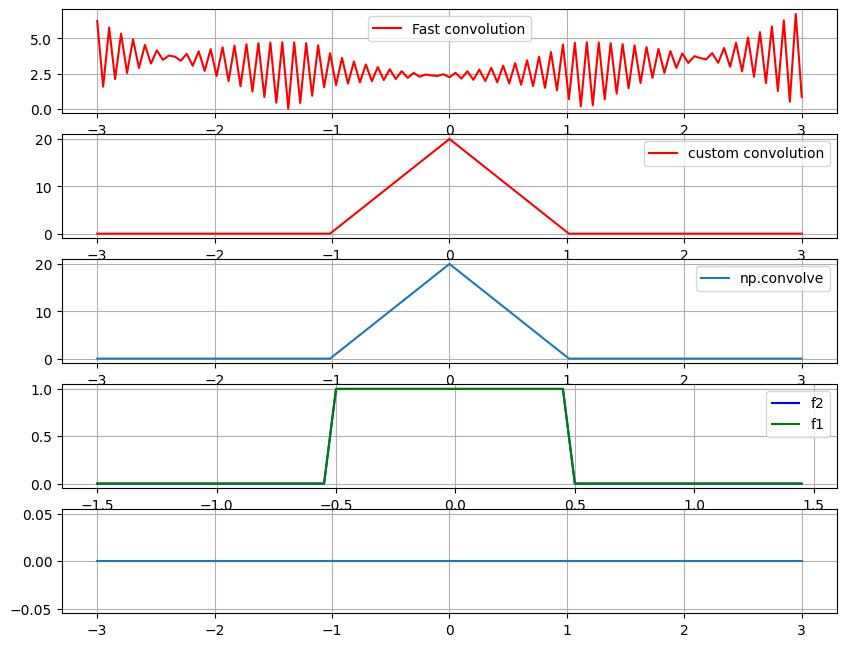

In [61]:
x = np.arange(-dataRange, dataRange, sampling)
test(rect, rect)

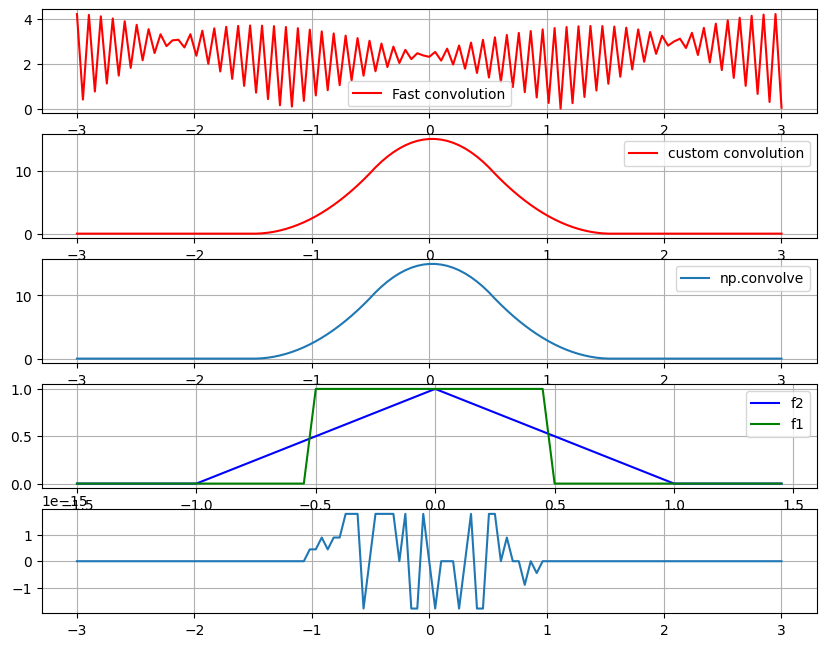

In [50]:
x = np.arange(-dataRange, dataRange, sampling)
test(rect, f1)

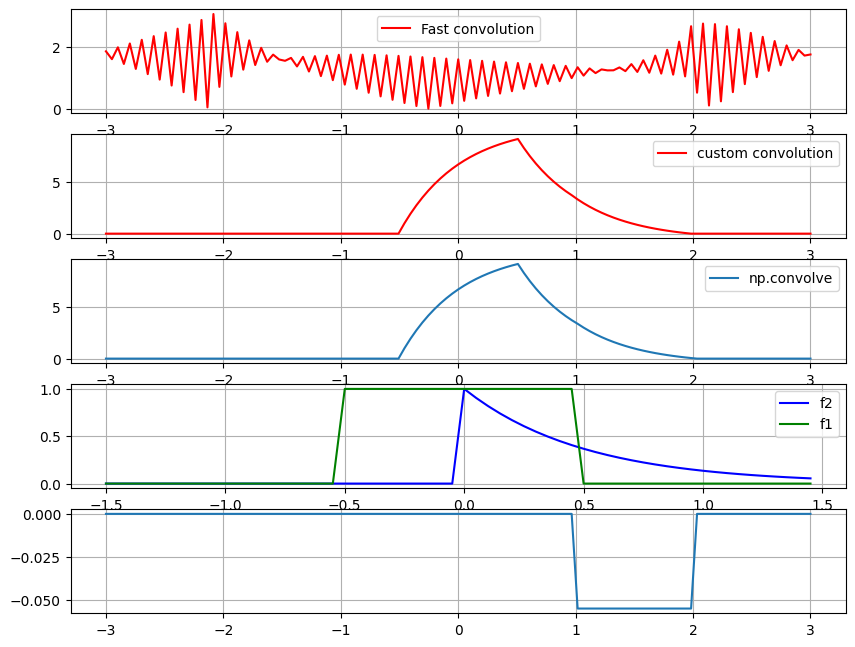

In [51]:
x = np.arange(-dataRange, dataRange, sampling)
test(rect, f2)